In [43]:
def rule3(dA, dB): # Where dA and dB are error in A and B
    dQ = math.sqrt(dA ** 2 + dB ** 2)
    return dQ

# Where the length of all 3 arrays are equal to the number of terms being multiplied
# varArray contains the variables A, B, C, ... in order
# powerArray contains the powers m, n, p, ... in order
# and errorArray contains the error in the variables dA, dB, dC, ... in order
def rule4(varArray, powerArray, errorArray, Q): 
    if not(len(varArray) == len(powerArray) == len(errorArray)):
        raise ValueError("Your arrays are not of equal length and the error cannot be calculated.")
        
    dQ = 0
    for i in range(len(varArray)): # Sum inside the square root
        dQ += ( (powerArray[i] * errorArray[i]) / varArray[i] ) ** 2
    dQ = Q * math.sqrt(dQ)
    return dQ

In [46]:
import math

# beware the ape code below

r = [7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0] # cm
rMid = [6.75, 6.25, 5.75, 5.25, 4.75, 4.25, 3.75, 3.25, 2.75, 2.25, 1.75, 1.25] # cm
dR = 0.1 # error in R

ch1 = [10.47, 10.24, 10.08, 9.78, 9.44, 9.12, 8.87, 8.40, 8.00, 7.47, 6.90, 6.26, 5.62] # volts
ch2 = [11.35, 11.09, 10.80, 10.55, 10.26, 9.91, 9.55, 9.19, 8.64, 8.22, 7.70, 7.04, 6.08] # volts
ch3 = [11.48, 11.23, 10.88, 10.53, 10.20, 9.68, 9.40, 9.00, 8.48, 7.96, 7.29, 6.54, 5.36] # volts
dVoltage = 0.1 # Error in voltage

# Consecutive differences, deltaV
diffCh1, diffCh2, diffCh3 = [0]*(len(ch1)-1),[0]*(len(ch1)-1),[0]*(len(ch1)-1) # volts
for i in range(len(ch1)-1):
    diffCh1[i] = ch1[i + 1] - ch1[i]
    diffCh2[i] = ch2[i + 1] - ch2[i]
    diffCh3[i] = ch3[i + 1] - ch3[i]
diffDVoltage = rule3(0.1, 0.1) # Error in consecutive differences of voltages

# Average 3 channels since they're all good
diffAvg = [0]*len(diffCh1) # volts
for i in range(len(diffCh1)):
    diffAvg[i] = (diffCh1[i] + diffCh2[i] + diffCh3[i])/3
    
# Calculate error in deltaR
dDeltaR = rule3(dR, dR) / 100 # Divide by 100 to convert to meters

# E(r) = -deltaV/deltaR
eArr = [0]*len(diffAvg) # Volts per meter
dEArr = [0]*len(diffAvg) # Error in E(r)
for i in range(len(diffAvg)):
    eArr[i] = -diffAvg[i]/0.005 # deltaR = 0.5 cm = 0.005 m
    dEArr[i] = rule4([-diffAvg[i], 0.005], [1,-1], [diffDVoltage, dDeltaR], eArr[i])

# Put rMid in meters
for i in range(len(rMid)):
    rMid[i] = rMid[i]/100

# Calculate ln(E(r)/E0) and ln(rMid/r0)
lnE = [0]*len(eArr) # No units
dlnE = [0]*len(eArr) # Error in lnE
lnRMid = [0]*len(rMid) # No units
for i in range(len(diffAvg)):
    lnE[i] = math.log(eArr[i]/1) # Divide by 1 volt/meter to make unitless
    lnRMid[i] = math.log(rMid[i]/1) # Divide by 1 meter to make unitless
    dlnE[i] = math.log(eArr[i]+dEArr[i]) - math.log(eArr[i]) # Brute force error

# lnRMid is backwards, so fix that
lnRMid.reverse()

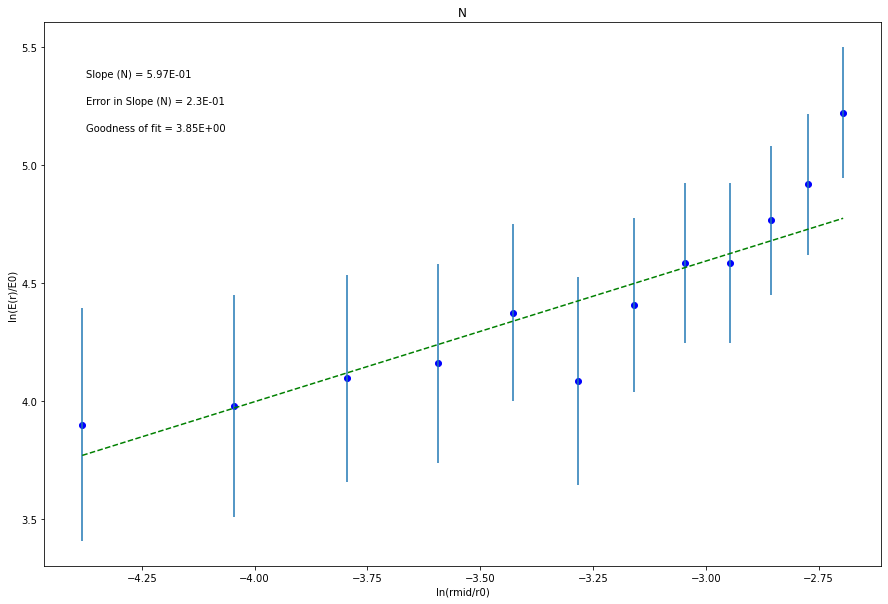

In [47]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
# lnE, lnRMid defined above


#--------------------------------------------#
#Create arrays for uncertainties
# dlnE defined above


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = np.array(lnRMid)  #this should be the array you want to plot on the x axis
y = np.array(lnE)
dy = np.array(dlnE) #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(rmid/r0)')
plt.ylabel('ln(E(r)/E0)')
plt.title('N')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (N) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (N) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
